In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
def load_contracts(url, years, extra):
    """
    Fetches the Basketball‑Reference contracts table at `url`,
    cleans it, and computes Salary Count & Average Salary.
    
    years: list of the six season‑column names, e.g.
           ["2022-23","2023-24","2024-25","2025-26","2026-27","2027-28"]
    """
    # Step 1–3: get & parse
    headers = {"User-Agent": "Mozilla/5.0"}
    resp = requests.get(url, headers=headers)
    resp.encoding = 'utf-8'
    soup = BeautifulSoup(resp.text, "html.parser")
    table = soup.find("table", {"id": "player-contracts"})
    
    # Step 4: read into pandas
    df = pd.read_html(str(table))[0]
    
    # Step 5: set cols
    if extra:
        df.columns = ["Rk", "Player", "Tm"] + years + ["BIRD"] + ["Guaranteed"]
    else:
        df.columns = ["Rk", "Player", "Tm"] + years + ["Guaranteed"]
    # Step 6: drop repeats/blanks
    df = df[
        df["Player"].notna()
        & (df["Player"] != "Player")
        & (df["Player"] != "Missing value")
    ].copy()
    
    # Step 7: count non-null salaries
    df['Salary Count'] = (
        df.iloc[:, 3:3+len(years)]
          .notnull()
          .sum(axis=1)
          .astype(int)
    )
    
    # Step 8: clean & convert Guaranteed to float
    df['Guaranteed'] = (
        df['Guaranteed']
          .astype(str)
          .str.replace(r'[^0-9\.]', '', regex=True)
    )
    df['Guaranteed'] = pd.to_numeric(df['Guaranteed'], errors='coerce')
    
    # report any failures
    bad = df['Guaranteed'].isna()
    if bad.any():
        print()
        #print("Rows with non‑numeric Guaranteed:",
        #      df.loc[bad, ['Player','Guaranteed']])
    
    # Step 9: compute average
    df['Average Salary'] = df['Guaranteed'] / df['Salary Count']

    
    return df

# --- now just call it for each snapshot:
years21 = ["2020-21","2021-22","2022-23","2023-24","2024-25","2025-26"] #
url21   = "https://web.archive.org/web/20220127184320/https://www.basketball-reference.com//contracts/players.html"
contract21 = load_contracts(url21, years21, True)

years22 = ["2021-22","2022-23","2023-24","2024-25","2025-26","2026-27"]
url22   = "https://web.archive.org/web/20220127184320/https://www.basketball-reference.com//contracts/players.html"
contract22 = load_contracts(url22, years22, True)

years23 = ["2022-23","2023-24","2024-25","2025-26","2026-27","2027-28"]
url23   = "https://web.archive.org/web/20230516051257/https://www.basketball-reference.com/contracts/players.html"
contract23 = load_contracts(url23, years23, False)

years24 = ["2023-24","2024-25","2025-26","2026-27","2027-28","2028-29"]
url24   = "https://web.archive.org/web/20240603223914/https://www.basketball-reference.com/contracts/players.html"
contract24 = load_contracts(url24, years24, False)

years25 = ["2024-25","2025-26","2026-27","2027-28","2028-29","2029-30"]
url25 = "https://www.basketball-reference.com/contracts/players.html"
contract25 = load_contracts(url25, years25, False)

years20 = ["2019-20","2020-21","2021-22","2022-23","2023-24","2024-25"]
url20   = "https://web.archive.org/web/20200531151724/https://www.basketball-reference.com/contracts/players.html"
contract20 = load_contracts(url20, years20, True)

years19 = ["2018-19","2019-20","2020-21","2021-22","2022-23","2023-24"]
url19   = "https://web.archive.org/web/20190331214937/https://www.basketball-reference.com/contracts/players.html"
contract19 = load_contracts(url19, years19, True)

years18 = ["2017-18","2018-19","2019-20","2020-21","2021-22","2022-23"]
url18   = "https://web.archive.org/web/20180501013800/https://www.basketball-reference.com/contracts/players.html"
contract18 = load_contracts(url18, years18, True)

years17 = ["2016-17","2017-18","2018-19","2019-20","2020-21","2021-22"]
url17   = "https://web.archive.org/web/20170406074406/http://www.basketball-reference.com/contracts/players.html"
contract17 = load_contracts(url17, years17, True)

years16 = ["2015-16","2016-17","2017-18","2018-19","2019-20","2020-21"]
url16   = "https://web.archive.org/web/20160416025143/http://www.basketball-reference.com/contracts/players.html"
#contract16 = load_contracts(url16, years16, True)

C:\Users\girth\AppData\Local\Temp\ipykernel_4476\2364878437.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


C:\Users\girth\AppData\Local\Temp\ipykernel_4476\2364878437.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


C:\Users\girth\AppData\Local\Temp\ipykernel_4476\2364878437.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\girth\AppData\Local\Temp\ipykernel_4476\2364878437.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


C:\Users\girth\AppData\Local\Temp\ipykernel_4476\2364878437.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\girth\AppData\Local\Temp\ipykernel_4476\2364878437.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\girth\AppData\Local\Temp\ipykernel_4476\2364878437.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


C:\Users\girth\AppData\Local\Temp\ipykernel_4476\2364878437.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


C:\Users\girth\AppData\Local\Temp\ipykernel_4476\2364878437.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [5]:
import pandas as pd

def load_stats(season):
    season_str = str(season)
    fn = f'text{season_str}.txt'
    df = pd.read_csv(fn, sep=',', header=None, encoding='utf-8')
    df.columns = [
        'Rank','Player','Age','Team','Position',
        'Games','Games Started','MP','FG','FGA','FG%',
        '3P','3PA','3P%','2P','2PA','2P%','eFG%',
        'FT','FTA','FT%','ORB','DRB','TRB',
        'AST','STL','BLK','TOV','PF','PTS',
        'Player_additional'
    ]
    return df

def load_advanced_stats(season):
    season_str = str(season)
    fn = f'advanced{season_str}.txt'
    df = pd.read_csv(fn, sep=',', header=None, encoding='utf-8')
    df.columns = [
        'Rank','Player','Age','Team','Position',
        'Games','GS','MP','PER','TS%','3PAr',
        'FTr','ORB%','DRB%','TRB%','AST%',
        'STL%','BLK%','TOV%','USG%','OWS',
        'DWS','WS','WS/48','OBPM',
        'DBPM','BPM','VORP','Player_additional'
    ]

    # Load team win% (no header, full names and win %)
    team_fn = f'tm20{season_str}.txt'
    df_tm = pd.read_csv(team_fn, sep=',', header=None, encoding='utf-8', names=['Team_Full', 'Team_Win%'])

    # Map full names to abbreviations used in player stats
    team_name_map = {
        'Oklahoma City Thunder': 'OKC',
        'Cleveland Cavaliers': 'CLE',
        'Boston Celtics': 'BOS',
        'Minnesota Timberwolves': 'MIN',
        'Los Angeles Clippers': 'LAC',
        'Houston Rockets': 'HOU',
        'Memphis Grizzlies': 'MEM',
        'Denver Nuggets': 'DEN',
        'New York Knicks': 'NYK',
        'Golden State Warriors': 'GSW',
        'Milwaukee Bucks': 'MIL',
        'Detroit Pistons': 'DET',
        'Indiana Pacers': 'IND',
        'Los Angeles Lakers': 'LAL',
        'Sacramento Kings': 'SAC',
        'Miami Heat': 'MIA',
        'Orlando Magic': 'ORL',
        'Dallas Mavericks': 'DAL',
        'Atlanta Hawks': 'ATL',
        'Chicago Bulls': 'CHI',
        'San Antonio Spurs': 'SAS',
        'Portland Trail Blazers': 'POR',
        'Phoenix Suns': 'PHO',
        'Toronto Raptors': 'TOR',
        'Philadelphia 76ers': 'PHI',
        'Brooklyn Nets': 'BRK',
        'Utah Jazz': 'UTA',
        'New Orleans Pelicans': 'NOP',
        'Charlotte Hornets': 'CHO',
        'Washington Wizards': 'WAS'
    }

    # Add 'Team' column based on mapping
    df_tm['Team'] = df_tm['Team_Full'].map(team_name_map)
    df_tm.dropna(subset=['Team'], inplace=True)

    return df, df_tm[['Team', 'Team_Win%']]

def merge_stats(season, next_year_suffix=True):
    """
    Load & merge basic + advanced + team win% for one season.
    season: int or str, e.g. 21, '22', 25
    next_year_suffix: if True, labels Season as '20{season}-{next}'
    """
    basic = load_stats(season)
    adv, team_stats = load_advanced_stats(season)

    # Merge basic + advanced
    merged = basic.merge(
        adv,
        on=['Player', 'Age', 'Team', 'Position'],
        how='left',
        suffixes=(None, '_adv')
    )

    # Merge in team win percentage
    merged = merged.merge(team_stats, on='Team', how='left')

    # Add readable season label
    s = str(season)
    if next_year_suffix:
        merged['Season'] = f'20{s}-{str(int(s)+1).zfill(2)}'
    else:
        merged['Season'] = s

    return merged

# —————————————————————————————
# Load multiple seasons
# —————————————————————————————
#stats16 = merge_stats(16)
stats17 = merge_stats(17)
stats18 = merge_stats(18)
stats19 = merge_stats(19)
stats20 = merge_stats(20)
stats21 = merge_stats(21)
stats22 = merge_stats(22)
stats23 = merge_stats(23)
stats24 = merge_stats(24)
stats25 = merge_stats(25)


In [6]:
def merge_contract_stats(contract_df, stats_df):
    """
    Strips whitespace from both DataFrames' Player columns
    and returns their inner merge on Player.
    """
    # work on copies so we don’t clobber originals
    c = contract_df.copy()
    s = stats_df  .copy()
    
    c['Player'] = c['Player'].str.strip()
    s['Player'] = s['Player'].str.strip()
    
    merged = pd.merge(
        c, s,
        on='Player',
        how='inner',
        suffixes=('_contract','_stats')
    )
    return merged

In [48]:
import unicodedata

# 1. Function to strip accents from names
def strip_accents(name):
    """Removes accents from characters (e.g., Jokić → Jokic)"""
    if isinstance(name, str):
        return ''.join(
            c for c in unicodedata.normalize('NFD', name)
            if unicodedata.category(c) != 'Mn'
        )
    return name

# 2. List of all stats and contract DataFrames to process
stats_dfs = [stats17, stats18, stats19, stats20, stats21, stats22, stats23, stats24, stats25]
contract_dfs = [contract17, contract18, contract19, contract20, contract21, contract22, contract23, contract24, contract25]

# 3. Apply accent-stripping to each DataFrame
for df in stats_dfs + contract_dfs:
    df['Player'] = df['Player'].apply(strip_accents)

print("✅ Accent stripping applied to all stats and contract DataFrames.")


✅ Accent stripping applied to all stats and contract DataFrames.


In [49]:
merged25 = merge_contract_stats(contract25, stats25)
merged24 = merge_contract_stats(contract24, stats24)
merged23 = merge_contract_stats(contract23, stats23)
merged22 = merge_contract_stats(contract22, stats22)
merged21 = merge_contract_stats(contract21, stats21)
merged20 = merge_contract_stats(contract20, stats20)
merged19 = merge_contract_stats(contract19, stats19)
merged18 = merge_contract_stats(contract18, stats18)
merged17 = merge_contract_stats(contract17, stats17)
#merged16 = merge_contract_stats(contract16, stats16)


In [50]:
display(contract18)

,Rk,Player,Tm,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23,BIRD,Guaranteed,Salary Count,Average Salary
0,1,Stephen Curry,GSW,"$34,682,550","$37,457,154","$40,231,758","$43,006,362","$45,780,966",NaN,Bird Rights,201158790.0,5,4.023176e+07
1,2,LeBron James,CLE,"$33,285,709","$35,607,968",NaN,NaN,NaN,NaN,Early Bird,33285709.0,2,1.664285e+07
2,3,Paul Millsap,DEN,"$31,269,231","$29,730,769","$30,500,000",NaN,NaN,NaN,Cap space,61000000.0,3,2.033333e+07
3,4,Gordon Hayward,BOS,"$29,727,900","$31,214,295","$32,700,690","$34,187,085",NaN,NaN,Cap space,93642885.0,4,2.341072e+07
4,5,Blake Griffin,DET,"$29,512,900","$31,873,932","$34,234,964","$36,595,996","$38,957,028",NaN,Bird Rights,132217792.0,5,2.644356e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,578,Quinn Cook,NOP,"$25,000",NaN,NaN,NaN,NaN,NaN,NaN,25000.0,1,2.500000e+04
634,579,Chris Johnson,HOU,"$25,000",NaN,NaN,NaN,NaN,NaN,NaN,25000.0,1,2.500000e+04
635,580,Beno Udrih,DET,"$25,000",NaN,NaN,NaN,NaN,NaN,NaN,25000.0,1,2.500000e+04
638,581,Joel Bolomboy,MIL,"$22,248",NaN,NaN,NaN,NaN,NaN,NaN,22248.0,1,2.224800e+04


In [8]:
#cap2016 = 70000000
cap2017 = 94143000
cap2018 = 99093000
cap2019 = 99093000
cap2020 = 99093000
cap2021 = 109140000 
cap2022 = 112414000
cap2023 = 123655000 
cap2024 = 136021000
cap2025 = 140588000 

In [51]:
def percent_of_cap(years, df, cap):
    """
    For each column in `years`, removes any commas (or $),
    converts to float, and then adds a
      'Percent of Cap {year}'
    column (in percent).
    """
    df = df.copy()
    
    for year in years:
        # 1) remove commas or dollar signs, then cast to float
        df[year] = (
            df[year]
              .astype(str)
              .str.replace(r'[,\$]', '', regex=True)
              .astype(float)
        )
        
        # 2) compute percent of cap
        df[f'Percent of Cap {year}'] = (df[year] / cap)
    
    return df


In [52]:
final25 = percent_of_cap(years25, merged25, cap2025)
final24 = percent_of_cap(years24, merged24, cap2024)
final23 = percent_of_cap(years23, merged23, cap2023)
final22 = percent_of_cap(years22, merged22, cap2022)
final21 = percent_of_cap(years21, merged21, cap2021)
final20 = percent_of_cap(years20, merged20, cap2020)
final19 = percent_of_cap(years19, merged19, cap2019)
final18 = percent_of_cap(years18, merged18, cap2018)
final17 = percent_of_cap(years17, merged17, cap2017)
#final16 = percent_of_cap(years16, merged16, cap2016)


In [53]:
display(final17)
display(final25)

,Rk,Player,Tm,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,BIRD,...,VORP,Player_additional_adv,Team_Win%,Season,Percent of Cap 2016-17,Percent of Cap 2017-18,Percent of Cap 2018-19,Percent of Cap 2019-20,Percent of Cap 2020-21,Percent of Cap 2021-22
0,1,LeBron James,CLE,30963450.0,33285709.0,35607968.0,NaN,NaN,NaN,Early Bird,...,6.7,jamesle01,0.622,2017-18,0.328898,0.353565,0.378233,NaN,NaN,NaN
1,2,Mike Conley,MEM,26540100.0,28530608.0,30521115.0,32511623.0,34504132.0,NaN,Cap Space,...,5.1,conlemi01,0.524,2017-18,0.281913,0.303056,0.324200,0.345343,0.366508,NaN
2,3,DeMar DeRozan,TOR,26540100.0,27739975.0,27739975.0,27739975.0,27739975.0,NaN,Cap Space,...,3.3,derozde01,0.622,2017-18,0.281913,0.294658,0.294658,0.294658,0.294658,NaN
3,4,James Harden,HOU,26540100.0,28299339.0,30431854.0,32703493.0,NaN,NaN,Bird Rights,...,8.0,hardeja01,0.671,2017-18,0.281913,0.300600,0.323251,0.347381,NaN,NaN
4,5,Al Horford,BOS,26540100.0,27734405.0,28928710.0,30123015.0,NaN,NaN,Cap Space,...,3.0,horfoal01,0.646,2017-18,0.281913,0.294599,0.307285,0.319971,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,622,Quinn Cook,DAL,31969.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,cookqu01,0.415,2017-18,0.000340,NaN,NaN,NaN,NaN,NaN
716,626,Lamar Patterson,ATL,25725.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.1,pattela01,0.524,2017-18,0.000273,NaN,NaN,NaN,NaN,NaN
717,629,Marcus Georges-Hunt,BOS,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,georgma01,0.354,2017-18,0.000266,NaN,NaN,NaN,NaN,NaN
718,632,Dahntay Jones,CLE,18255.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,jonesda02,0.622,2017-18,0.000194,NaN,NaN,NaN,NaN,NaN


,Rk,Player,Tm,2024-25,2025-26,2026-27,2027-28,2028-29,2029-30,Guaranteed,...,VORP,Player_additional_adv,Team_Win%,Season,Percent of Cap 2024-25,Percent of Cap 2025-26,Percent of Cap 2026-27,Percent of Cap 2027-28,Percent of Cap 2028-29,Percent of Cap 2029-30
0,1,Stephen Curry,GSW,55761216.0,59606817.0,62587158.0,NaN,NaN,NaN,177955191,...,4.8,curryst01,0.585,2025-26,0.396629,0.423982,0.445181,NaN,NaN,NaN
1,2,Joel Embiid,PHI,51415938.0,55224526.0,57985752.0,62624612.0,67263472.0,NaN,227250828,...,0.8,embiijo01,0.293,2025-26,0.365721,0.392811,0.412452,0.445448,0.478444,NaN
2,3,Nikola Jokic,DEN,51415938.0,55224526.0,59033114.0,62841702.0,NaN,NaN,165673578,...,9.8,jokicni01,0.610,2025-26,0.365721,0.392811,0.419902,0.446992,NaN,NaN
3,4,Kevin Durant,PHO,51179021.0,54708609.0,NaN,NaN,NaN,NaN,105887630,...,3.0,duranke01,0.439,2025-26,0.364035,0.389141,NaN,NaN,NaN,NaN
4,5,Bradley Beal,PHO,50203930.0,53666270.0,57128610.0,NaN,NaN,NaN,103870200,...,0.4,bealbr01,0.439,2025-26,0.357100,0.381727,0.406355,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,559,Isaiah Mobley,PHI,11997.0,NaN,NaN,NaN,NaN,NaN,11997,...,0.0,mobleis01,0.293,2025-26,0.000085,NaN,NaN,NaN,NaN,NaN
531,560,Braxton Key,GSW,11997.0,NaN,NaN,NaN,NaN,NaN,11997,...,0.0,keybr01,0.585,2025-26,0.000085,NaN,NaN,NaN,NaN,NaN
532,561,JD Davison,BOS,11997.0,2270735.0,NaN,NaN,NaN,NaN,11997,...,-0.1,davisjd01,0.744,2025-26,0.000085,0.016152,NaN,NaN,NaN,NaN
533,562,Kylor Kelley,NOP,73153.0,NaN,NaN,NaN,NaN,NaN,73153,...,-0.1,kelleky01,NaN,2025-26,0.000520,NaN,NaN,NaN,NaN,NaN


In [54]:
final22.drop('BIRD', axis=1, inplace=True)
final21.drop('BIRD', axis=1, inplace=True)
final20.drop('BIRD', axis=1, inplace=True)
final19.drop('BIRD', axis=1, inplace=True)
final18.drop('BIRD', axis=1, inplace=True)
final17.drop('BIRD', axis=1, inplace=True)

In [55]:
def avg_percent_of_cap(years, df):
    """
    Calculates the average of the 'Percent of Cap {year}' columns for each player.
    Ignores missing values during the calculation.
    
    years: list of years for which 'Percent of Cap {year}' columns exist.
    df: DataFrame containing the 'Percent of Cap {year}' columns.
    
    Returns:
        DataFrame with an additional column 'Average Percent of Cap'.
    """
    percent_columns = [f'Percent of Cap {year}' for year in years]
    df['Average Percent of Cap'] = df[percent_columns].mean(axis=1, skipna=True)
    return df

In [56]:
final25 = avg_percent_of_cap(years25, final25)
final24 = avg_percent_of_cap(years24, final24)
final23 = avg_percent_of_cap(years23, final23)
final22 = avg_percent_of_cap(years22, final22)
final21 = avg_percent_of_cap(years21, final21)
final20 = avg_percent_of_cap(years20, final20)
final19 = avg_percent_of_cap(years19, final19)
final18 = avg_percent_of_cap(years18, final18)  
final17 = avg_percent_of_cap(years17, final17)  

In [57]:
season_dfs = {
    '2016-17': final17,
    '2017-18': final17,
    '2018-19': final18,
    '2019-20': final19,
    '2020-21': final21,
    '2021-22': final22,
    '2022-23': final23,
    '2023-24': final24,
    '2024-25': final25
}

all_seasons = pd.concat(
    (df.assign(Season=season) for season, df in season_dfs.items()),
    ignore_index=True
)

# 3) (Optional) Reorder so Season is first
cols = ['Season'] + [c for c in all_seasons.columns if c != 'Season']
all_seasons = all_seasons[cols]


In [58]:
print(all_seasons.columns)

Index(['Season', 'Rk', 'Player', 'Tm', '2016-17', '2017-18', '2018-19',
       '2019-20', '2020-21', '2021-22', 'Guaranteed', 'Salary Count',
       'Average Salary', 'Rank', 'Age', 'Team', 'Position', 'Games',
       'Games Started', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Player_additional', 'Rank_adv',
       'Games_adv', 'GS', 'MP_adv', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Player_additional_adv',
       'Team_Win%', 'Percent of Cap 2016-17', 'Percent of Cap 2017-18',
       'Percent of Cap 2018-19', 'Percent of Cap 2019-20',
       'Percent of Cap 2020-21', 'Percent of Cap 2021-22',
       'Average Percent of Cap', '2022-23', 'Percent of Cap 2022-23',
       '2023-24', 'Percent of Cap 2023-24', '2024-25', '2025-26',
       '

In [59]:
all_seasons.drop('Player_additional_adv', axis=1, inplace=True)
all_seasons.drop('Rank_adv', axis=1, inplace=True)
all_seasons.drop('Games_adv', axis=1, inplace=True)
all_seasons.drop('GS', axis=1, inplace=True)
all_seasons.drop('MP_adv', axis=1, inplace=True)

In [60]:
print(all_seasons.columns)

Index(['Season', 'Rk', 'Player', 'Tm', '2016-17', '2017-18', '2018-19',
       '2019-20', '2020-21', '2021-22', 'Guaranteed', 'Salary Count',
       'Average Salary', 'Rank', 'Age', 'Team', 'Position', 'Games',
       'Games Started', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Player_additional', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'Team_Win%', 'Percent of Cap 2016-17', 'Percent of Cap 2017-18',
       'Percent of Cap 2018-19', 'Percent of Cap 2019-20',
       'Percent of Cap 2020-21', 'Percent of Cap 2021-22',
       'Average Percent of Cap', '2022-23', 'Percent of Cap 2022-23',
       '2023-24', 'Percent of Cap 2023-24', '2024-25', '2025-26',
       'Percent of Cap 2024-25', 'Percent of Cap 2025-26', '2026-27',
       'Per

In [61]:
display(all_seasons)

,Season,Rk,Player,Tm,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,...,Percent of Cap 2024-25,Percent of Cap 2025-26,2026-27,Percent of Cap 2026-27,2027-28,Percent of Cap 2027-28,2028-29,Percent of Cap 2028-29,2029-30,Percent of Cap 2029-30
0,2016-17,1,LeBron James,CLE,30963450.0,33285709.0,35607968.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-17,2,Mike Conley,MEM,26540100.0,28530608.0,30521115.0,32511623.0,34504132.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-17,3,DeMar DeRozan,TOR,26540100.0,27739975.0,27739975.0,27739975.0,27739975.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-17,4,James Harden,HOU,26540100.0,28299339.0,30431854.0,32703493.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-17,5,Al Horford,BOS,26540100.0,27734405.0,28928710.0,30123015.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5366,2024-25,559,Isaiah Mobley,PHI,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5367,2024-25,560,Braxton Key,GSW,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5368,2024-25,561,JD Davison,BOS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000085,0.016152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5369,2024-25,562,Kylor Kelley,NOP,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



🔹 Pooled OLS Results:
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     1238.
Date:                Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                        23:06:07   Log-Likelihood:            -1.3103e+05
No. Observations:                7660   AIC:                         2.621e+05
Df Residuals:                    7648   BIC:                         2.622e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.156e+06    1.5e

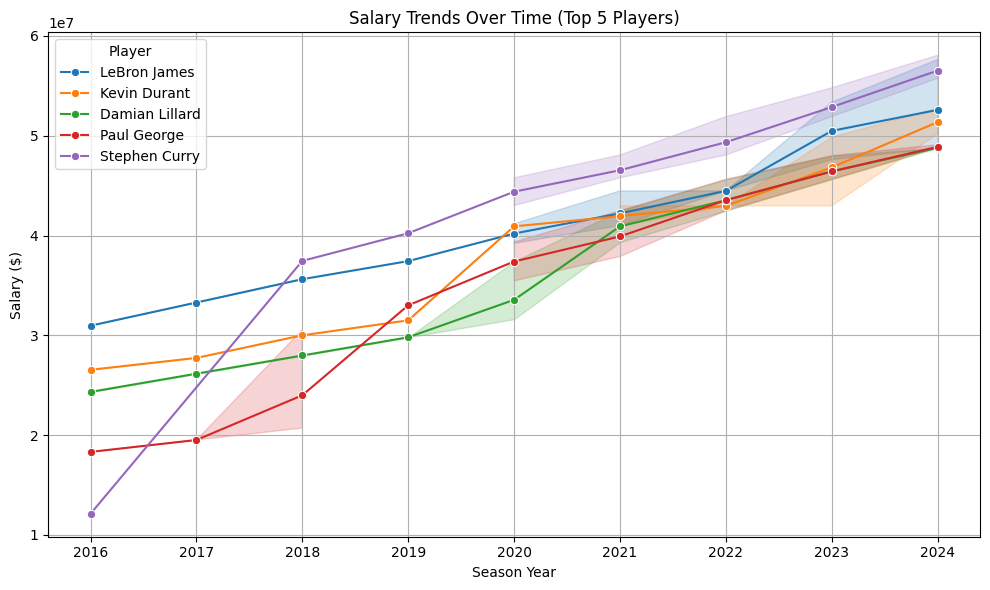

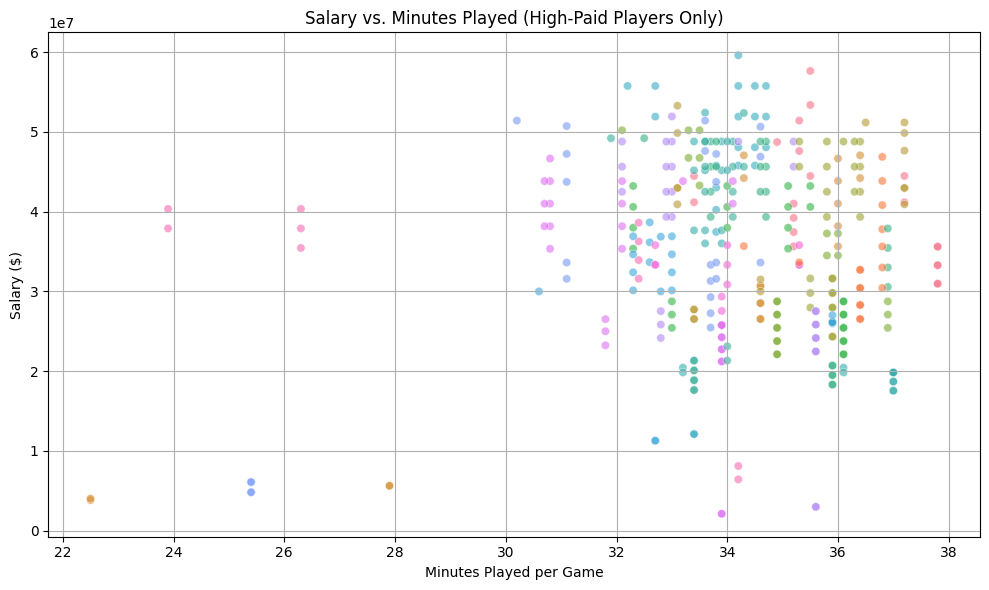

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

# 1. Load your dataset
df = all_seasons.copy()

# 2. Define salary columns
salary_cols = ['2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24', '2024-25']

# 3. Reshape into long format
df_long = df.melt(
    id_vars=['Player', 'Team', 'Age', 'MP', 'FG', 'USG%', 'Team_Win%', 'TS%', 'PER', 'BPM', 'VORP', 'WS/48'],
    value_vars=salary_cols,
    var_name='Season',
    value_name='Salary'
)

# 4. Clean and feature engineering
df_long['Season_Year'] = df_long['Season'].str[:4].astype(int)
df_long['USG_Win'] = df_long['USG%'] * df_long['Team_Win%']

# 5. Define predictors
predictors = ['MP', 'FG', 'Age', 'USG%', 'Team_Win%', 'TS%', 'PER', 'BPM', 'VORP', 'WS/48', 'USG_Win']

# 6. Drop missing data
df_long = df_long.dropna(subset=predictors + ['Salary'])

# 7. Set panel structure
df_long = df_long.set_index(['Player', 'Season_Year'])

# 8. Run Pooled OLS
pooled_ols = sm.OLS(df_long['Salary'], sm.add_constant(df_long[predictors])).fit()
print("\n🔹 Pooled OLS Results:")
print(pooled_ols.summary())

# 9. Run Fixed Effects model
fe_model = PanelOLS(df_long['Salary'], df_long[predictors], entity_effects=True).fit()
print("\n🔹 Fixed Effects Model Results:")
print(fe_model.summary)

# 10. Salary trend plot for top 5 earners
top_players = df_long.groupby('Player')['Salary'].mean().nlargest(5).index
trend_df = df_long.reset_index()
trend_df = trend_df[trend_df['Player'].isin(top_players)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_df, x='Season_Year', y='Salary', hue='Player', marker='o')
plt.title("Salary Trends Over Time (Top 5 Players)")
plt.ylabel("Salary ($)")
plt.xlabel("Season Year")
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Salary vs MP for high-paid players only
high_paid_df = df_long.reset_index()
high_paid_df = high_paid_df.groupby('Player').filter(lambda x: x['Salary'].mean() > 3e7)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=high_paid_df, x='MP', y='Salary', hue='Player', legend=False, alpha=0.6)
plt.title("Salary vs. Minutes Played (High-Paid Players Only)")
plt.xlabel("Minutes Played per Game")
plt.ylabel("Salary ($)")
plt.grid(True)
plt.tight_layout()
plt.show()



✅ Significant predictors kept: ['MP', 'FG', 'FG_squared', 'Age', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'FT%', 'PER', 'VORP', 'BPM', 'WS', 'WS/48', 'USG%', 'Team_Win%', 'PTS_Win', 'USG_TS', 'Age_PER']

🔹 Final Pooled OLS Results (Raw Salary):
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     963.6
Date:                Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                        23:06:15   Log-Likelihood:            -1.4925e+05
No. Observations:                8693   AIC:                         2.986e+05
Df Residuals:                    8671   BIC:                         2.987e+05
Df Model:                          21                                         
Covariance Type:            nonrobust     

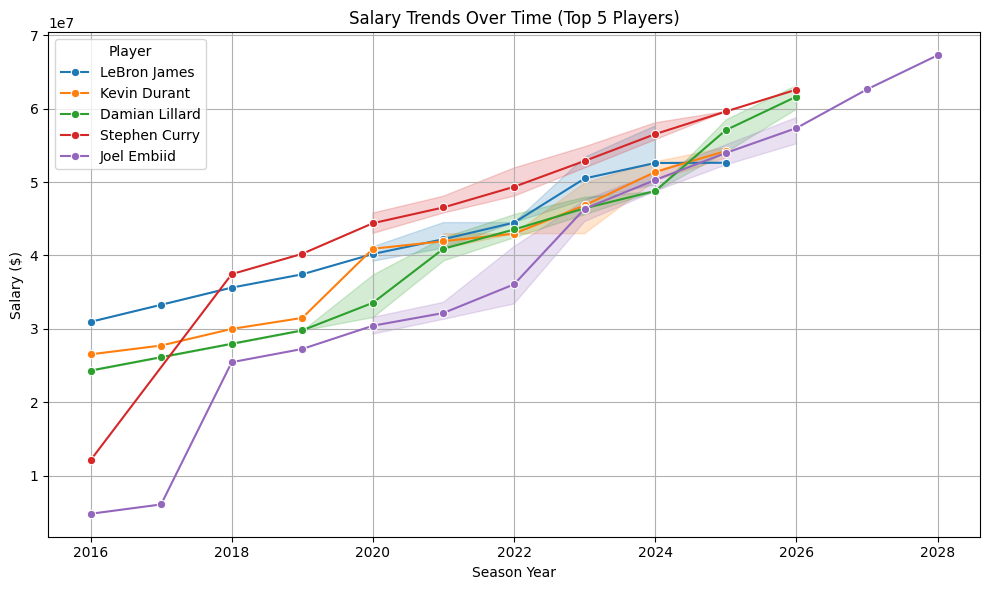

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and reshape
df = all_seasons.copy()
salary_cols = [col for col in df.columns if col.startswith("20") and '-' in col]
df_long = df.melt(
    id_vars=[
        'Player', 'Team', 'Age', 'MP', 'FG', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV',
        'FT%', 'TS%', 'PER', 'VORP', 'BPM', 'OBPM', 'DBPM', 'WS', 'WS/48', 'USG%', 'Team_Win%'
    ],
    value_vars=salary_cols,
    var_name='Season',
    value_name='Salary'
)

# 2. Feature engineering
df_long['Season_Year'] = df_long['Season'].str[:4].astype(int)
df_long['FG_squared'] = df_long['FG'] ** 2
df_long['PTS_Win'] = df_long['PTS'] * df_long['Team_Win%']
df_long['USG_TS'] = df_long['USG%'] * df_long['TS%']
df_long['Age_PER'] = df_long['Age'] * df_long['PER']

# 3. Full predictor list
all_predictors = [
    'MP', 'FG', 'FG_squared', 'Age', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV',
    'FT%', 'TS%', 'PER', 'VORP', 'BPM', 'OBPM', 'DBPM', 'WS', 'WS/48', 'USG%', 'Team_Win%',
    'PTS_Win', 'USG_TS', 'Age_PER'
]

# 4. Drop missing data
df_long = df_long.dropna(subset=all_predictors + ['Salary'])

# 5. Set panel structure
df_long = df_long.set_index(['Player', 'Season_Year'])

# 6. Initial Pooled OLS
X = sm.add_constant(df_long[all_predictors])
y = df_long['Salary']
model = sm.OLS(y, X).fit()

# 7. Automatically filter significant predictors
significant_predictors = model.pvalues[model.pvalues < 0.05].index.tolist()
if 'const' in significant_predictors:
    significant_predictors.remove('const')

print(f"\n✅ Significant predictors kept: {significant_predictors}")

# 8. Final Pooled OLS model
X_sig = sm.add_constant(df_long[significant_predictors])
final_ols = sm.OLS(y, X_sig).fit()
print("\n🔹 Final Pooled OLS Results (Raw Salary):")
print(final_ols.summary())

# 9. Final Fixed Effects model
fe_model = PanelOLS(df_long['Salary'], df_long[significant_predictors], entity_effects=True).fit()
print("\n🔹 Fixed Effects Model Results (Raw Salary):")
print(fe_model.summary)

# 10. Plot salary trends for top 5 paid players---
top_players = df_long.groupby('Player')['Salary'].mean().nlargest(5).index
trend_df = df_long.reset_index()
trend_df = trend_df[trend_df['Player'].isin(top_players)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_df, x='Season_Year', y='Salary', hue='Player', marker='o')
plt.title("Salary Trends Over Time (Top 5 Players)")
plt.ylabel("Salary ($)")
plt.xlabel("Season Year")
plt.grid(True)
plt.tight_layout()
plt.show()



📊 Evaluation on Test Set:
R² Score:      0.6943
MAE:           $4,854,495.78
RMSE:          $6,780,879.10


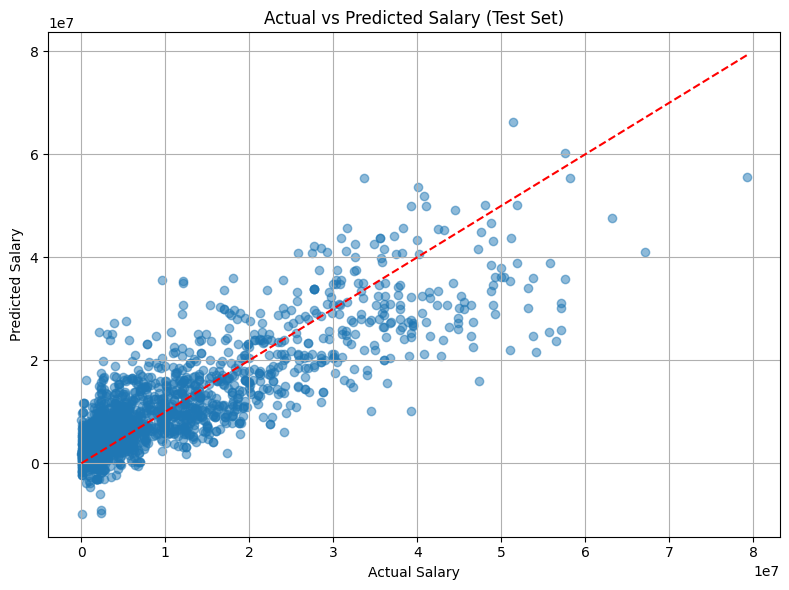

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Reset index for modeling
df_model = df_long.reset_index()

# Define target and features
X = df_model[significant_predictors]
y = df_model['Salary']

# 1. Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Fit Pooled OLS model on training data
X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const).fit()

# 3. Predict on test data
X_test_const = sm.add_constant(X_test)
y_pred = ols_model.predict(X_test_const)

# 4. Evaluate predictions
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Evaluation on Test Set:")
print(f"R² Score:      {r2:.4f}")
print(f"MAE:           ${mae:,.2f}")
print(f"RMSE:          ${rmse:,.2f}")

# 5. Plot: Actual vs Predicted Salary
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()


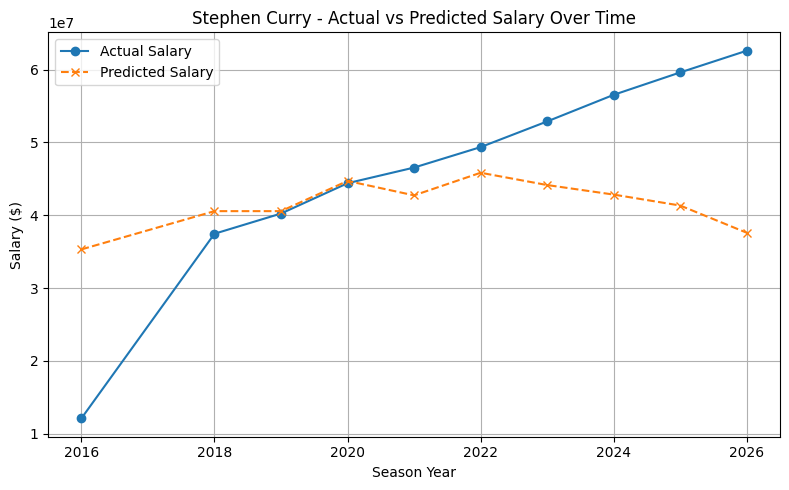

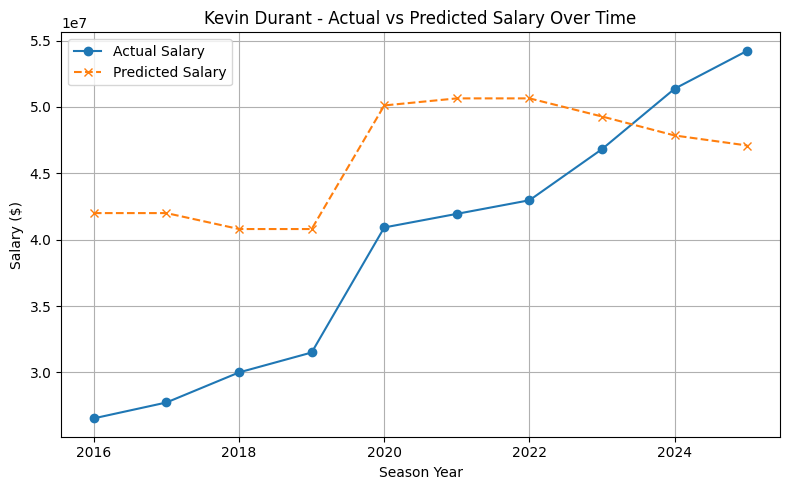

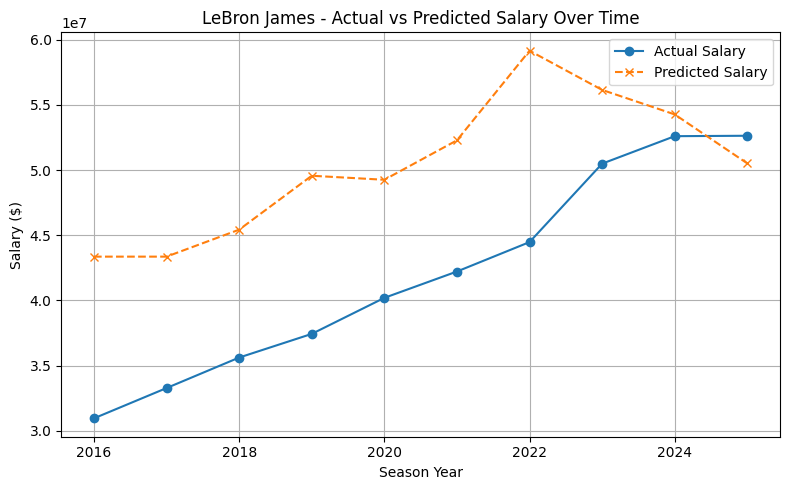

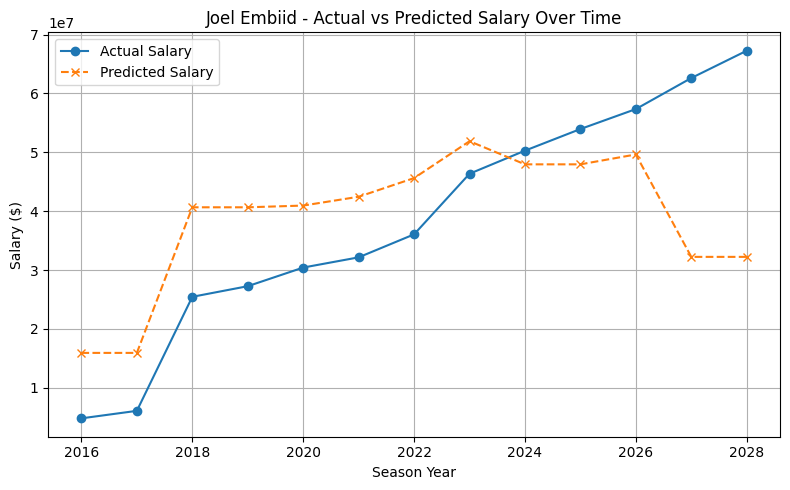

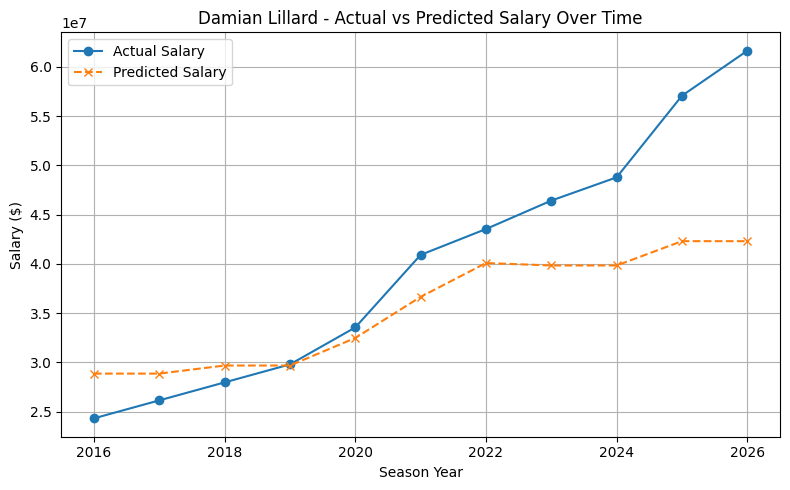

In [70]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1. Generate predictions if not already done
if 'Predicted_Salary' not in df_model.columns:
    X_full = df_model[significant_predictors]
    X_full_const = sm.add_constant(X_full)
    df_model['Predicted_Salary'] = final_ols.predict(X_full_const)

# 2. Identify top N players by average actual salary
top_n = 5
top_players = df_model.groupby('Player')['Salary'].mean().nlargest(top_n).index

# 3. Plot each player separately: actual vs predicted salary over time
for player in top_players:
    player_data = df_model[df_model['Player'] == player]

    # Optional: group by season to avoid duplicates
    player_data = (
        player_data.groupby('Season_Year')[['Salary', 'Predicted_Salary']]
        .mean()
        .reset_index()
    )

    plt.figure(figsize=(8, 5))
    plt.plot(player_data['Season_Year'], player_data['Salary'], label='Actual Salary', marker='o')
    plt.plot(player_data['Season_Year'], player_data['Predicted_Salary'], label='Predicted Salary', linestyle='--', marker='x')

    plt.title(f"{player} - Actual vs Predicted Salary Over Time")
    plt.xlabel("Season Year")
    plt.ylabel("Salary ($)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



✅ Significant predictors kept: ['FG', 'FG_squared', 'Age', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'PER', 'VORP', 'WS', 'Team_Win%', 'PTS_Win', 'Age_PER']

🔹 Final Pooled OLS Results (Percent of Cap):
                            OLS Regression Results                            
Dep. Variable:         Percent_of_Cap   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     1390.
Date:                Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                        23:11:19   Log-Likelihood:                 12560.
No. Observations:                8693   AIC:                        -2.509e+04
Df Residuals:                    8677   BIC:                        -2.497e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
      

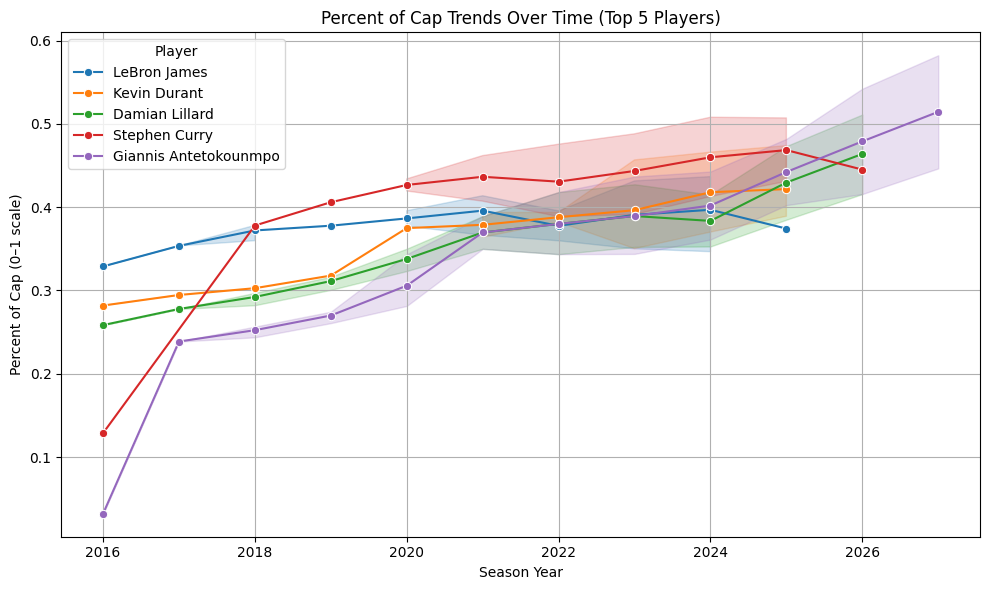

In [71]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and reshape
df = all_seasons.copy()
salary_cols = [col for col in df.columns if col.startswith("20") and '-' in col and not col.startswith("Percent")]
cap_cols = [col for col in df.columns if col.startswith("Percent of Cap")]

df_long = df.melt(
    id_vars=[
        'Player', 'Team', 'Age', 'MP', 'FG', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV',
        'FT%', 'TS%', 'PER', 'VORP', 'BPM', 'OBPM', 'DBPM', 'WS', 'WS/48', 'USG%', 'Team_Win%'
    ] + cap_cols,
    value_vars=salary_cols,
    var_name='Season',
    value_name='Salary'
)

# 2. Feature engineering
df_long['Season_Year'] = df_long['Season'].str[:4].astype(int)
df_long['FG_squared'] = df_long['FG'] ** 2
df_long['PTS_Win'] = df_long['PTS'] * df_long['Team_Win%']
df_long['USG_TS'] = df_long['USG%'] * df_long['TS%']
df_long['Age_PER'] = df_long['Age'] * df_long['PER']

# 3. Pull Percent of Cap for the correct year
df_long['Percent_of_Cap'] = df_long.apply(
    lambda row: row.get(f"Percent of Cap {row['Season']}"), axis=1
)

# 4. Final predictor list
all_predictors = [
    'MP', 'FG', 'FG_squared', 'Age', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV',
    'FT%', 'TS%', 'PER', 'VORP', 'BPM', 'OBPM', 'DBPM', 'WS', 'WS/48', 'USG%', 'Team_Win%',
    'PTS_Win', 'USG_TS', 'Age_PER'
]

# 5. Drop missing data
df_long = df_long.dropna(subset=all_predictors + ['Percent_of_Cap'])

# 6. Set panel structure
df_long = df_long.set_index(['Player', 'Season_Year'])

# 7. Initial Pooled OLS
X = sm.add_constant(df_long[all_predictors])
y = df_long['Percent_of_Cap']
model = sm.OLS(y, X).fit()

# 8. Automatically filter significant predictors
significant_predictors = model.pvalues[model.pvalues < 0.05].index.tolist()
if 'const' in significant_predictors:
    significant_predictors.remove('const')

print(f"\n✅ Significant predictors kept: {significant_predictors}")

# 9. Final Pooled OLS model
X_sig = sm.add_constant(df_long[significant_predictors])
final_ols = sm.OLS(y, X_sig).fit()
print("\n🔹 Final Pooled OLS Results (Percent of Cap):")
print(final_ols.summary())

# 10. Final Fixed Effects model
fe_model = PanelOLS(df_long['Percent_of_Cap'], df_long[significant_predictors], entity_effects=True).fit()
print("\n🔹 Fixed Effects Model Results (Percent of Cap):")
print(fe_model.summary)

# 11. Plot percent-of-cap trends for top 5 players
top_players = df_long.groupby('Player')['Percent_of_Cap'].mean().nlargest(5).index
trend_df = df_long.reset_index()
trend_df = trend_df[trend_df['Player'].isin(top_players)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_df, x='Season_Year', y='Percent_of_Cap', hue='Player', marker='o')
plt.title("Percent of Cap Trends Over Time (Top 5 Players)")
plt.ylabel("Percent of Cap (0–1 scale)")
plt.xlabel("Season Year")
plt.grid(True)
plt.tight_layout()
plt.show()


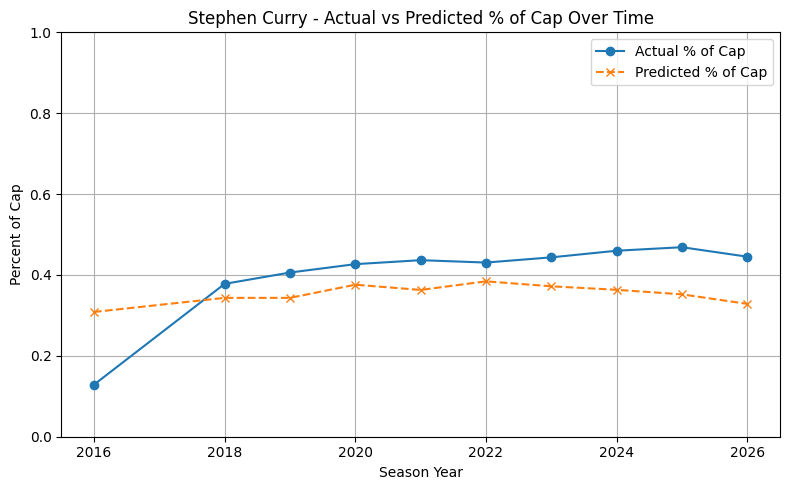

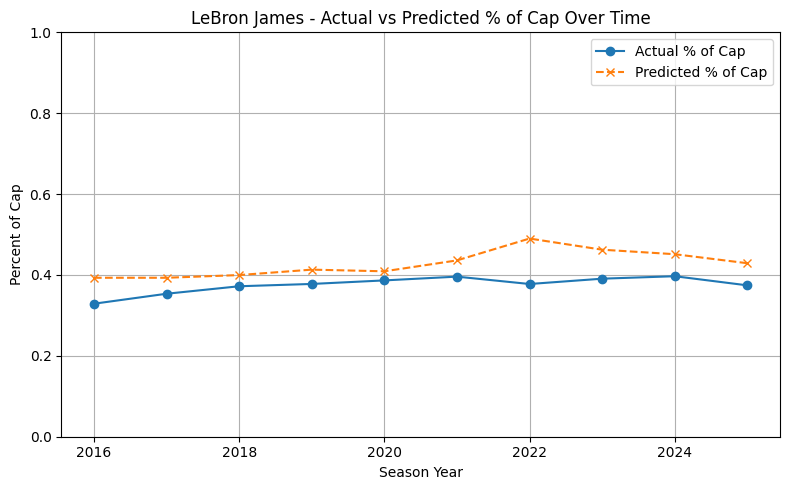

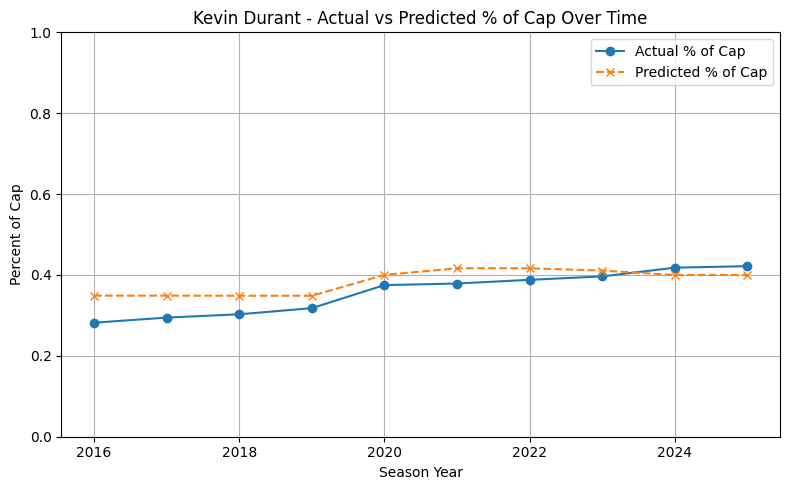

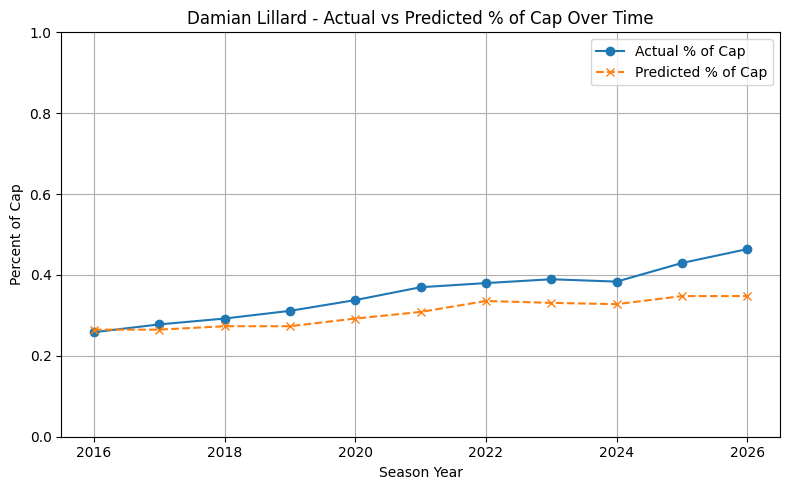

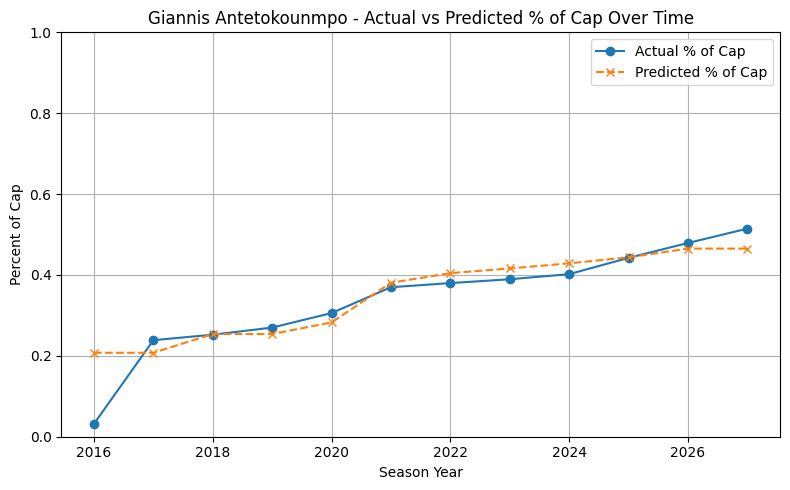

In [72]:
# 1. Generate predictions if not already added
if 'Predicted_Percent_of_Cap' not in df_long.columns:
    X_full = sm.add_constant(df_long[significant_predictors])
    df_long['Predicted_Percent_of_Cap'] = final_ols.predict(X_full)

# 2. Reset index to plot easily
df_model = df_long.reset_index()

# 3. Get top N players by average actual Percent of Cap
top_n = 5
top_players = df_model.groupby('Player')['Percent_of_Cap'].mean().nlargest(top_n).index

# 4. Plot Actual vs Predicted Percent of Cap per player
for player in top_players:
    player_data = df_model[df_model['Player'] == player]

    # Optional: average duplicates (if any)
    player_data = (
        player_data.groupby('Season_Year')[['Percent_of_Cap', 'Predicted_Percent_of_Cap']]
        .mean()
        .reset_index()
    )

    plt.figure(figsize=(8, 5))
    plt.plot(player_data['Season_Year'], player_data['Percent_of_Cap'], label='Actual % of Cap', marker='o')
    plt.plot(player_data['Season_Year'], player_data['Predicted_Percent_of_Cap'], label='Predicted % of Cap', linestyle='--', marker='x')
    plt.title(f"{player} - Actual vs Predicted % of Cap Over Time")
    plt.xlabel("Season Year")
    plt.ylabel("Percent of Cap")
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



📊 2024-25 Season Evaluation:
R² Score:  0.751
MAE:       0.044
RMSE:      0.061

🔍 Top 10 Contract Residuals (2024-25):
                       Player Team  Season_Year  Percent_of_Cap  \
7510       Michael Porter Jr.  DEN         2025        0.328162   
7525       Karl-Anthony Towns  MIN         2025        0.430105   
7826             Bradley Beal  PHO         2025        0.381727   
7486       Michael Porter Jr.  DEN         2025        0.359813   
7487            Stephen Curry  GSW         2025        0.530244   
7485  Shai Gilgeous-Alexander  OKC         2025        0.359813   
7840          Lauri Markkanen  UTA         2025        0.330000   
7516             Bradley Beal  WAS         2025        0.434000   
7616             Bradley Beal  PHO         2025        0.394544   
7519              Rudy Gobert  MIN         2025        0.377301   

      Predicted_Percent_of_Cap  Residual  
7510                  0.090669  0.237493  
7525                  0.215539  0.214565  
7826        

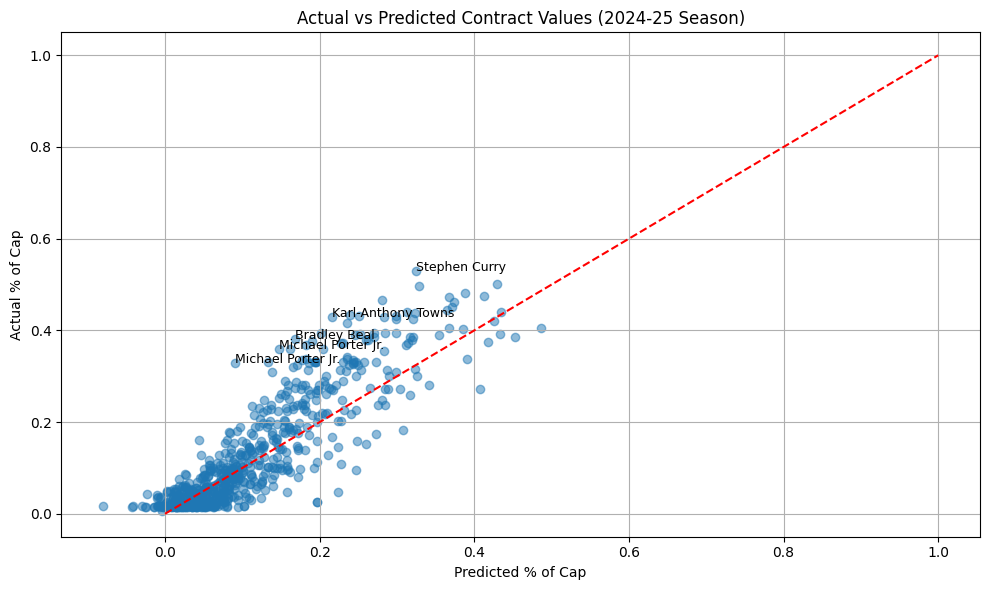

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# 1. Reset index so we can slice by year
df_model = df_long.reset_index()

# 2. Train/test split (train on all seasons before 2025)
train = df_model[df_model['Season_Year'] < 2025].copy()
test = df_model[df_model['Season_Year'] == 2025].copy()

# 3. Fit model on training set
X_train = sm.add_constant(train[significant_predictors])
y_train = train['Percent_of_Cap']
model_train = sm.OLS(y_train, X_train).fit()

# 4. Predict on 2024-25 season (test set)
X_test = sm.add_constant(test[significant_predictors])
y_test = test['Percent_of_Cap']
y_pred = model_train.predict(X_test)

# 5. Store predictions and residuals
test['Predicted_Percent_of_Cap'] = y_pred
test['Residual'] = test['Percent_of_Cap'] - test['Predicted_Percent_of_Cap']
test['Abs_Residual'] = test['Residual'].abs()

# 6. Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n📊 2024-25 Season Evaluation:")
print(f"R² Score:  {r2:.3f}")
print(f"MAE:       {mae:.3f}")
print(f"RMSE:      {rmse:.3f}")

# 7. Show top 10 players with largest residuals
top_residuals = test.sort_values(by='Abs_Residual', ascending=False)
print("\n🔍 Top 10 Contract Residuals (2024-25):")
print(top_residuals[['Player', 'Team', 'Season_Year', 'Percent_of_Cap', 'Predicted_Percent_of_Cap', 'Residual']].head(10))

# 8. Scatter plot: actual vs predicted with annotations
plt.figure(figsize=(10, 6))
plt.scatter(test['Predicted_Percent_of_Cap'], test['Percent_of_Cap'], alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("Predicted % of Cap")
plt.ylabel("Actual % of Cap")
plt.title("Actual vs Predicted Contract Values (2024-25 Season)")
plt.grid(True)

# Annotate top 5 largest residuals
for _, row in top_residuals.head(5).iterrows():
    plt.annotate(row['Player'], 
                 (row['Predicted_Percent_of_Cap'], row['Percent_of_Cap']),
                 fontsize=9)

plt.tight_layout()
plt.show()


In [87]:
# 1. Reset and clean
df_model = df_long.reset_index()

# 2. Train/test split
train = df_model[df_model['Season_Year'] < 2025].copy()
test_raw = df_model[df_model['Season_Year'] == 2025].copy()

# 3. Deduplicate test set: keep only one row per player
test = (
    test_raw.groupby('Player', as_index=False)
    .agg({**{col: 'mean' for col in ['Percent_of_Cap'] + significant_predictors}, 'Team': 'first', 'Season_Year': 'first'})
)

# 4. Fit model
X_train = sm.add_constant(train[significant_predictors])
y_train = train['Percent_of_Cap']
model = sm.OLS(y_train, X_train).fit()

# 5. Predict
X_test = sm.add_constant(test[significant_predictors])
test['Predicted_Percent_of_Cap'] = model.predict(X_test)

# 6. Residuals
test['Residual'] = test['Percent_of_Cap'] - test['Predicted_Percent_of_Cap']
test['Abs_Residual'] = test['Residual'].abs()

# 7. Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2 = r2_score(test['Percent_of_Cap'], test['Predicted_Percent_of_Cap'])
mae = mean_absolute_error(test['Percent_of_Cap'], test['Predicted_Percent_of_Cap'])
rmse = np.sqrt(mean_squared_error(test['Percent_of_Cap'], test['Predicted_Percent_of_Cap']))

print(f"\n📊 2024-25 Season Evaluation:")
print(f"R² Score:  {r2:.3f}")
print(f"MAE:       {mae:.3f}")
print(f"RMSE:      {rmse:.3f}")

# 8. Format and display top residuals
top_residuals = test.sort_values(by='Abs_Residual', ascending=False)
residual_table = top_residuals[['Player', 'Team', 'Season_Year', 'Percent_of_Cap', 'Predicted_Percent_of_Cap', 'Residual']].copy()
residual_table.columns = ['Player', 'Team', 'Season', 'Actual % of Cap', 'Predicted % of Cap', 'Residual']
residual_table[['Actual % of Cap', 'Predicted % of Cap', 'Residual']] = residual_table[['Actual % of Cap', 'Predicted % of Cap', 'Residual']].round(3)

# 9. Styled table (Jupyter only)
styled_table = residual_table.head(50).style\
    .bar(subset=['Residual'], color='#d65f5f', align='mid')\
    .background_gradient(subset=['Actual % of Cap', 'Predicted % of Cap'], cmap='Blues')\
    .set_caption("Top 15 Contract Residuals — 2024-25 Season")\
    .set_properties(**{'text-align': 'center'})\
    .set_table_styles([{
        'selector': 'caption',
        'props': [('caption-side', 'top'), ('font-size', '16px'), ('font-weight', 'bold')]
    }])

styled_table



📊 2024-25 Season Evaluation:
R² Score:  0.781
MAE:       0.037
RMSE:      0.052


,Player,Team,Season,Actual % of Cap,Predicted % of Cap,Residual
36,Bradley Beal,WAS,2025,0.403000,0.203000,0.200000
235,Lauri Markkanen,UTA,2025,0.330000,0.134000,0.196000
293,Paul George,PHI,2025,0.368000,0.182000,0.185000
310,Russell Westbrook,DEN,2025,0.025000,0.196000,-0.171000
255,Michael Porter Jr.,DEN,2025,0.310000,0.142000,0.168000
341,Tyrese Haliburton,IND,2025,0.330000,0.174000,0.156000
356,Zach LaVine,CHI,2025,0.355000,0.206000,0.149000
110,Fred VanVleet,HOU,2025,0.325000,0.180000,0.145000
176,Jimmy Butler,MIA,2025,0.425000,0.283000,0.142000
204,Karl-Anthony Towns,MIN,2025,0.400000,0.260000,0.140000


In [79]:
display(all_seasons)

,Season,Rk,Player,Tm,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,...,Percent of Cap 2024-25,Percent of Cap 2025-26,2026-27,Percent of Cap 2026-27,2027-28,Percent of Cap 2027-28,2028-29,Percent of Cap 2028-29,2029-30,Percent of Cap 2029-30
0,2016-17,1,LeBron James,CLE,30963450.0,33285709.0,35607968.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-17,2,Mike Conley,MEM,26540100.0,28530608.0,30521115.0,32511623.0,34504132.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-17,3,DeMar DeRozan,TOR,26540100.0,27739975.0,27739975.0,27739975.0,27739975.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-17,4,James Harden,HOU,26540100.0,28299339.0,30431854.0,32703493.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-17,5,Al Horford,BOS,26540100.0,27734405.0,28928710.0,30123015.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5366,2024-25,559,Isaiah Mobley,PHI,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5367,2024-25,560,Braxton Key,GSW,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5368,2024-25,561,JD Davison,BOS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000085,0.016152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5369,2024-25,562,Kylor Kelley,NOP,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
